   latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0   28.0993    96.9983       303.0   1.1    1.1  2021-01-01       409   
1   30.0420    79.6492       301.8   1.4    1.2  2021-01-01       547   
2   30.0879    78.8579       300.2   1.3    1.1  2021-01-01       547   
3   30.0408    80.0501       302.0   1.5    1.2  2021-01-01       547   
4   30.6565    78.9668       300.9   1.3    1.1  2021-01-01       547   

  satellite instrument  confidence  version  bright_t31   frp daynight  type  
0     Terra      MODIS          44     6.03       292.6   8.6        D     0  
1     Terra      MODIS          37     6.03       287.4   9.0        D     0  
2     Terra      MODIS           8     6.03       286.5   5.4        D     0  
3     Terra      MODIS          46     6.03       287.7  10.7        D     0  
4     Terra      MODIS          43     6.03       287.6   9.0        D     0  
   latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0   30.1138   

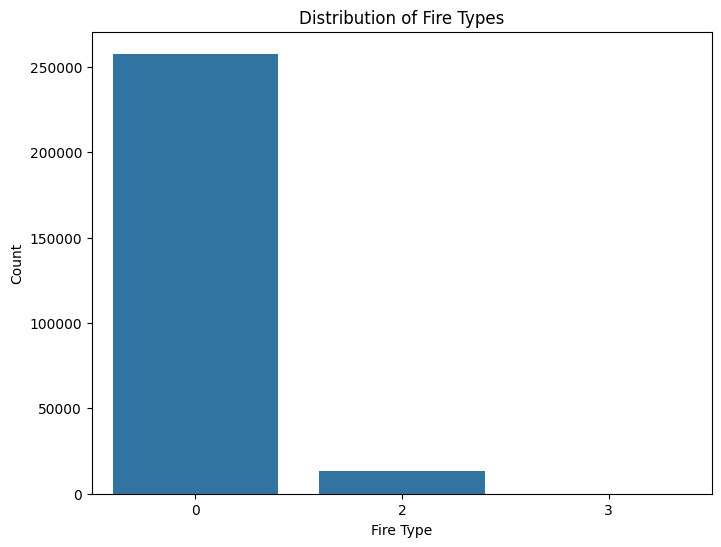

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
#from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Loading the data sets
df1 = pd.read_csv('DataSet_2021.csv')
df2 = pd.read_csv('DataSet_2022.csv')
df3 = pd.read_csv('DataSet_2023.csv')

print(df1.head())
print(df2.head())
print(df3.head())

#concating all 3 datasets into single dataframe
df = pd.concat([df1, df2, df3], ignore_index= True)
print('Combined data set: ', df.head())
print('Printing the shape of the dataframe: ', df.shape)
df.info()

#Checking for missing values
print(df.isnull().sum())
df.duplicated().sum()

#Printing columns
print(df.columns)

#statistics of dataset
df.describe().T

#Check Unique values of target variable
df.type.value_counts()

#Check unique and n unique for all categorical features
for col in df.columns:
    if df[col].dtype == 'object':
        print(f'Column: {col}')
        print(f'Unique values: {df[col].unique()}')
        print(f'Number of unique values: {df[col].nunique()}')
        print('-'*50)

#Count plot for 'type' [seaborn]
plt.figure(figsize=(8,6))
sns.countplot(x= 'type', data= df)
plt.title('Distribution of Fire Types')
plt.xlabel('Fire Type')
plt.ylabel('Count')
plt.show()

#Histogram of 'confidence'
plt.figure(figsize= (8,6))
sns.histplot(df['confidence'], bins= 20, kde= True)
plt.title('Distribution of Confidence')
plt
